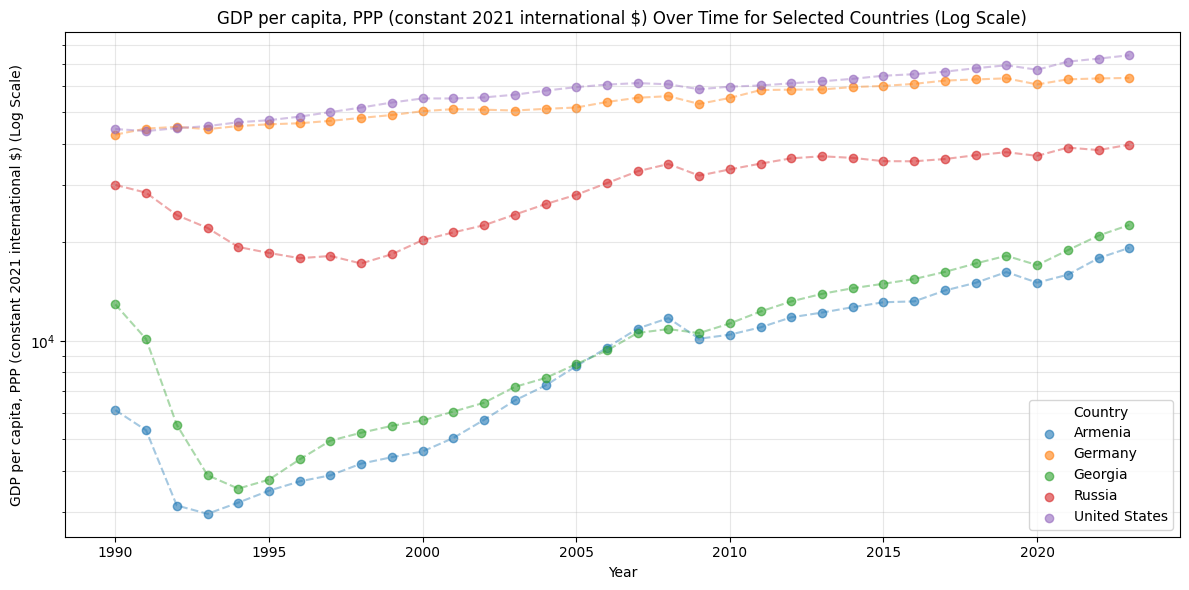

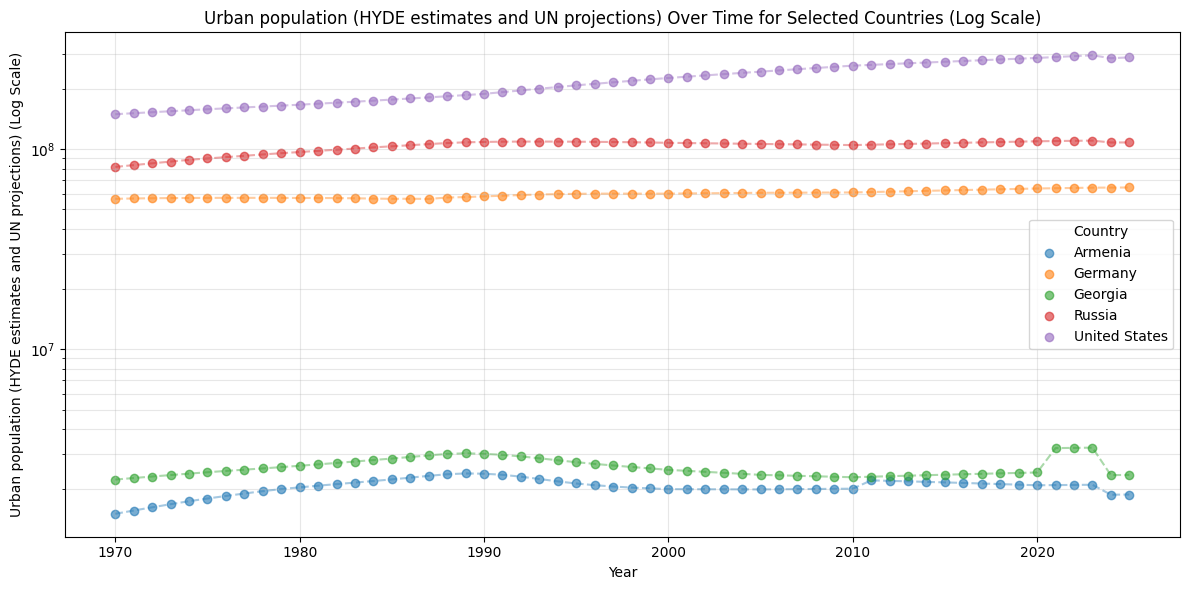

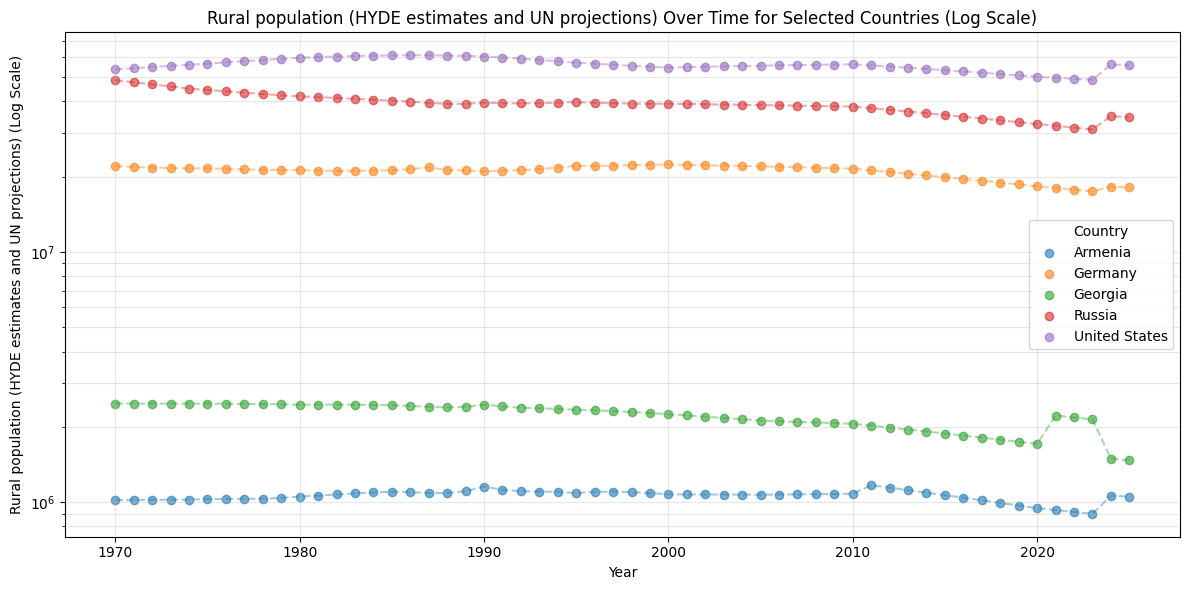

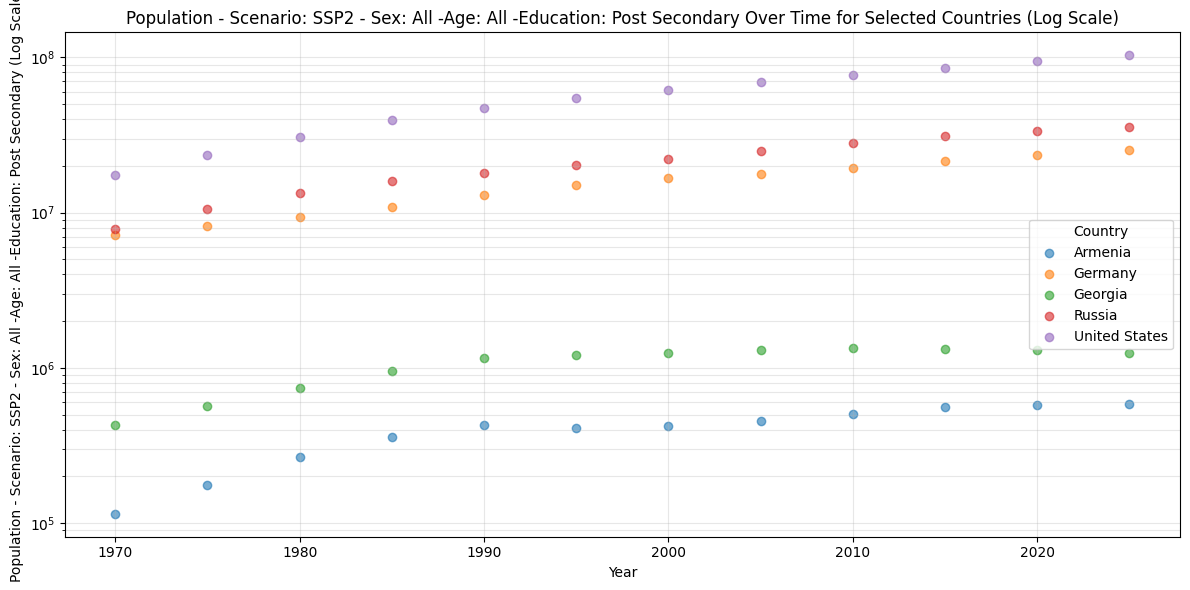

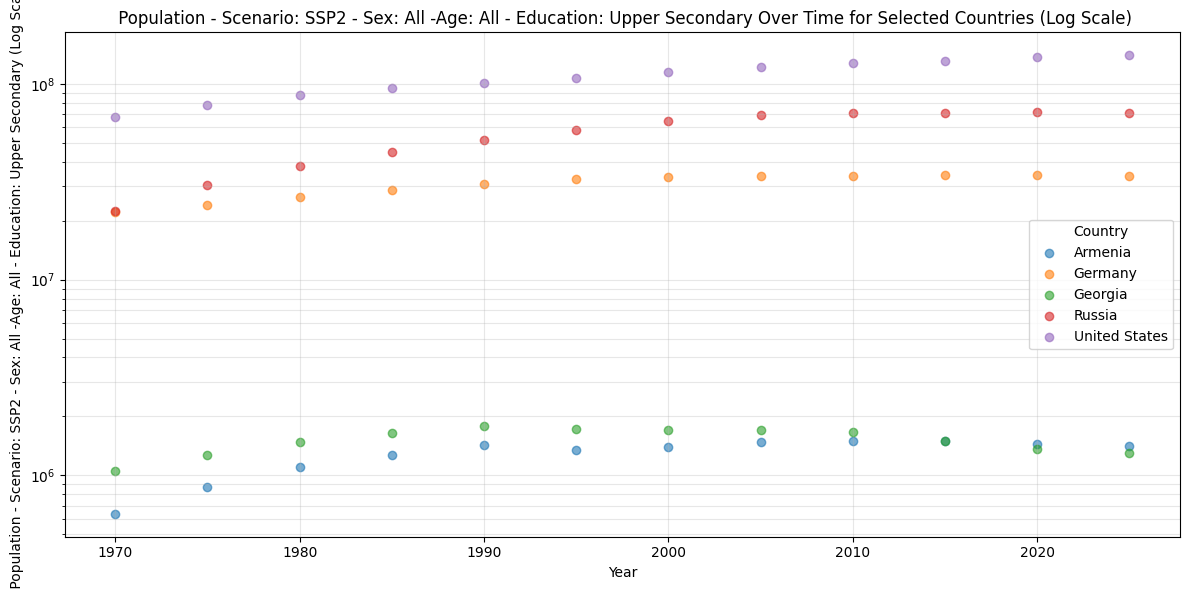

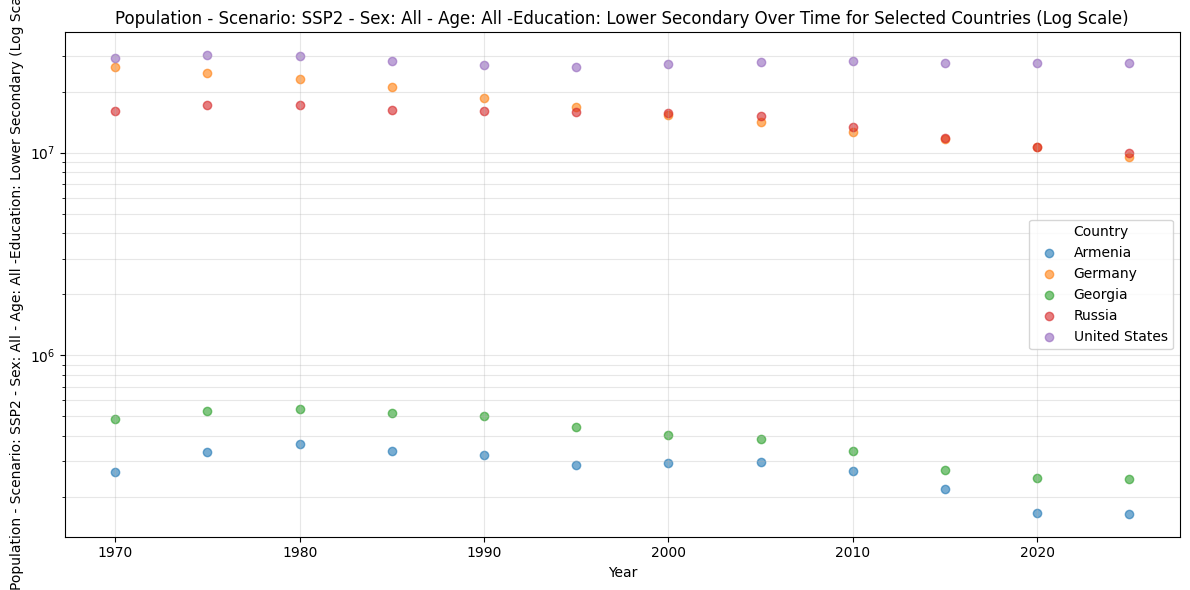

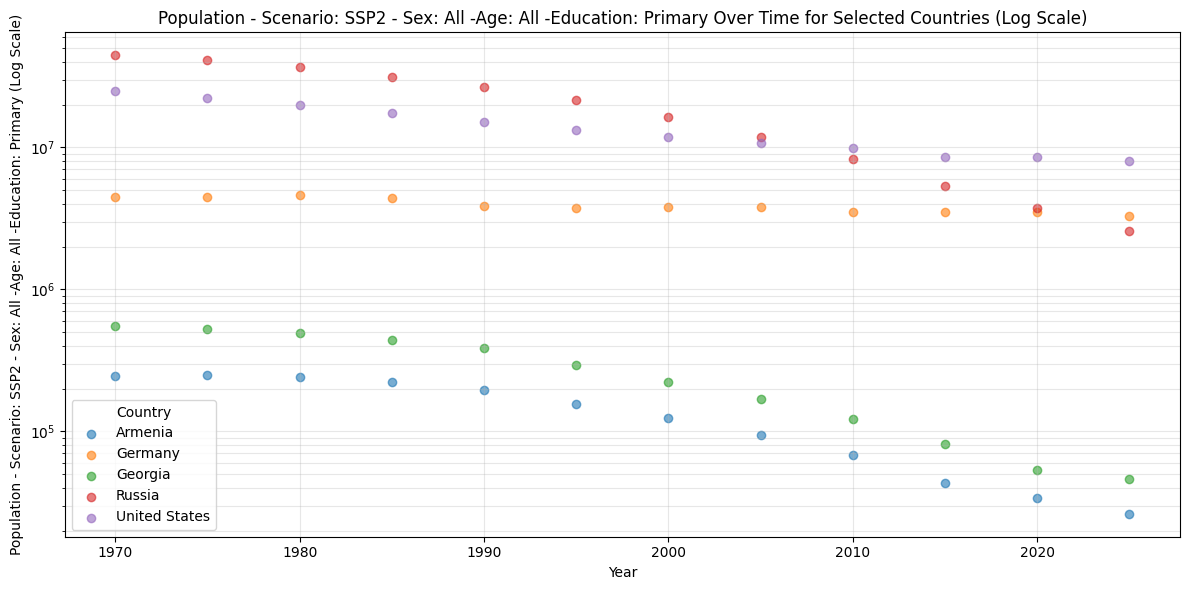

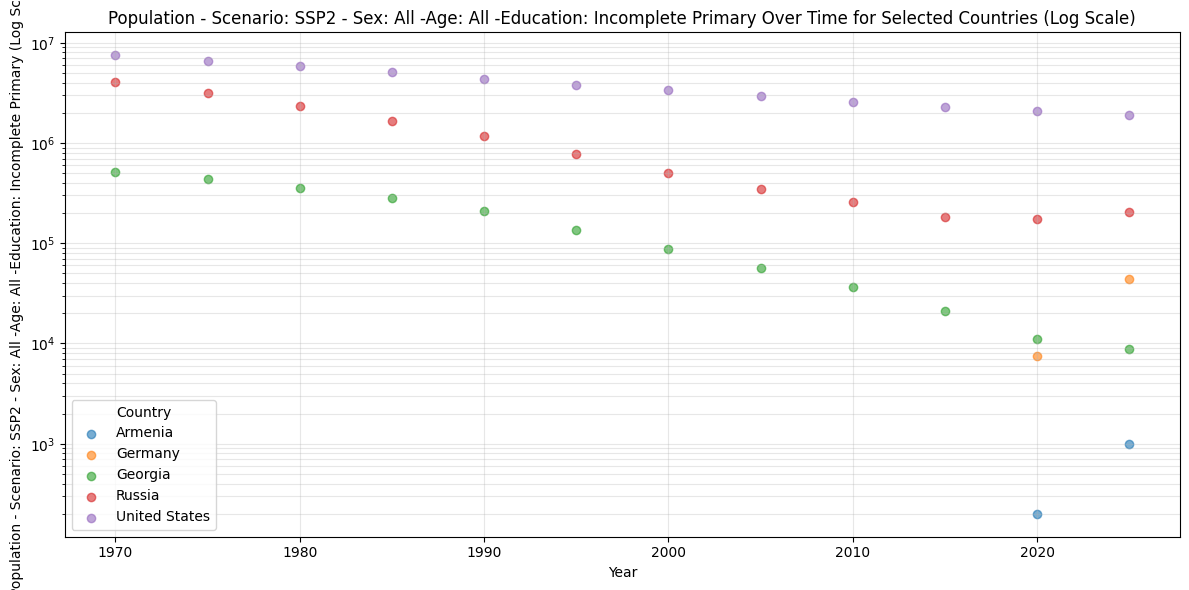

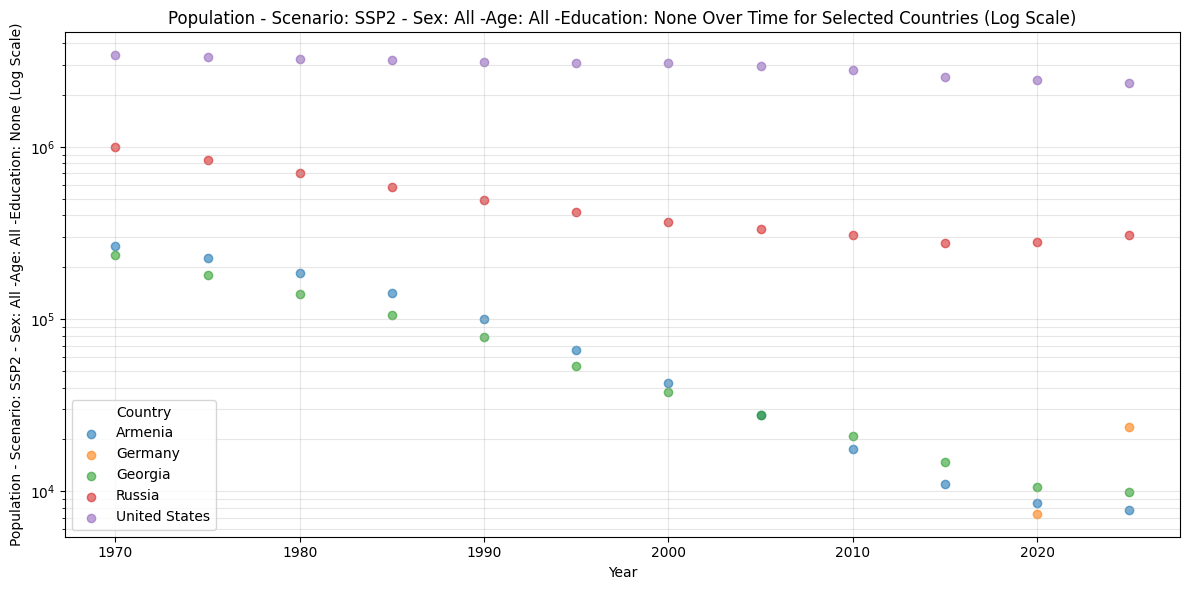

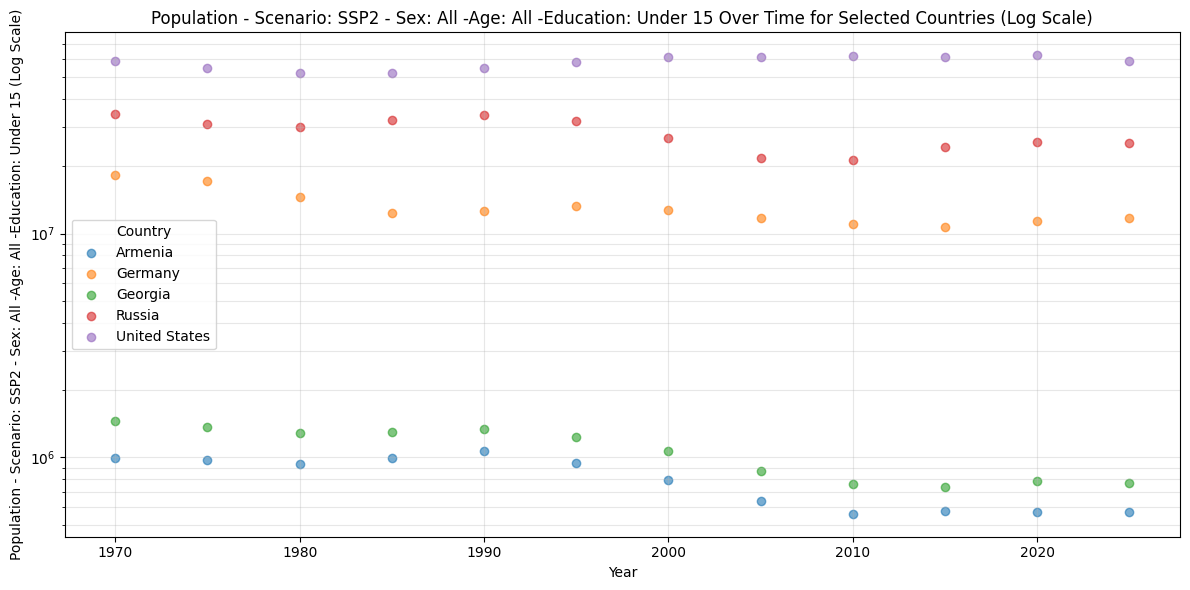

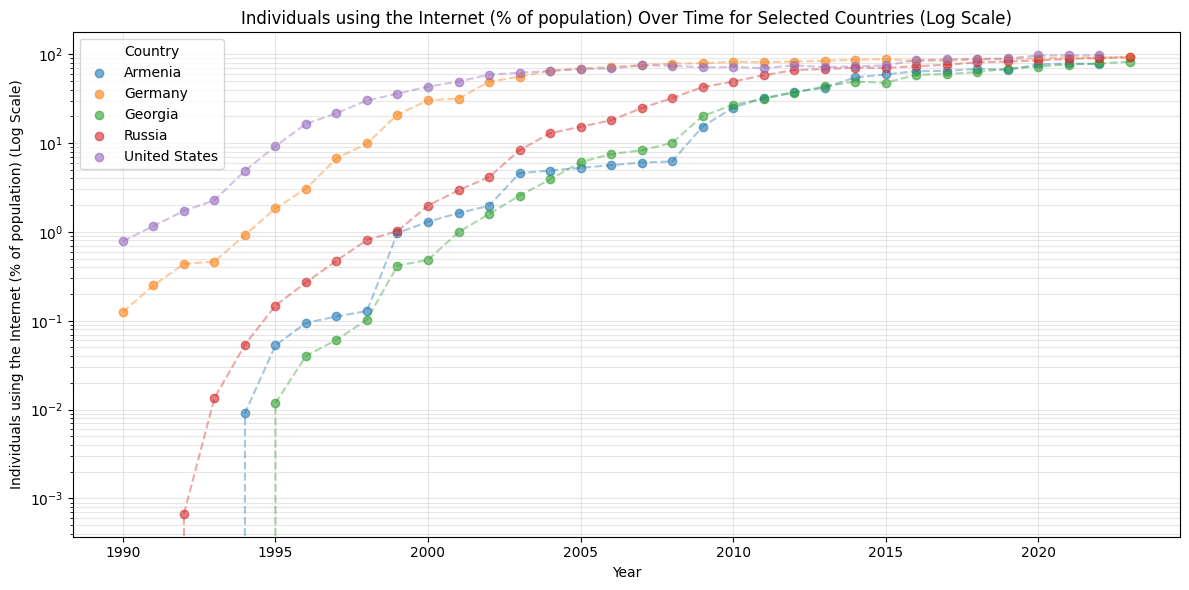

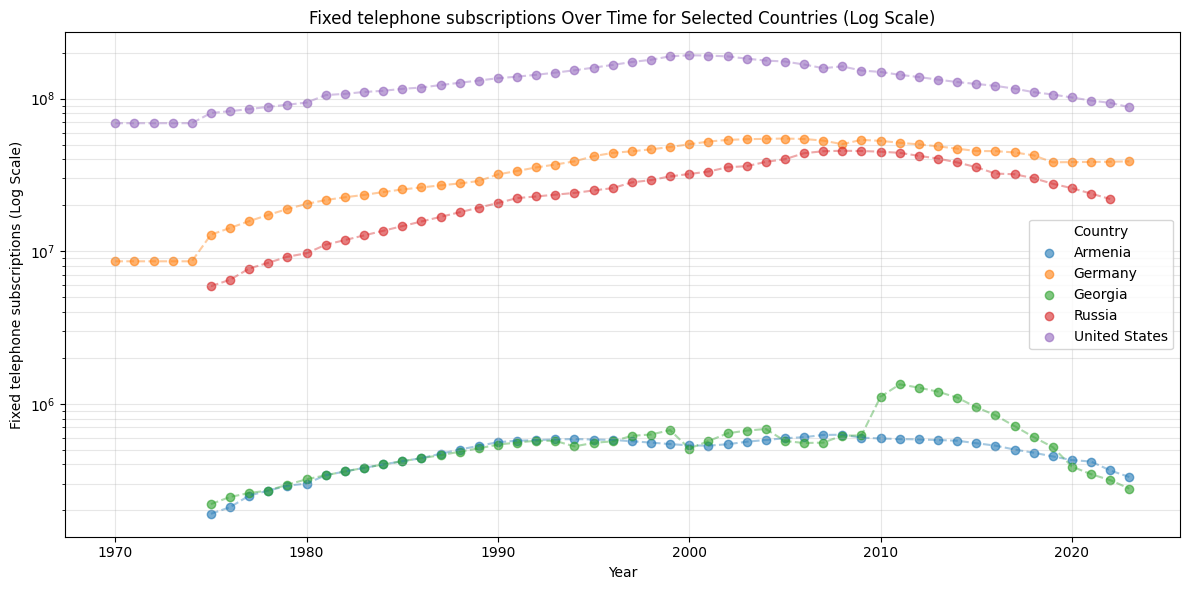

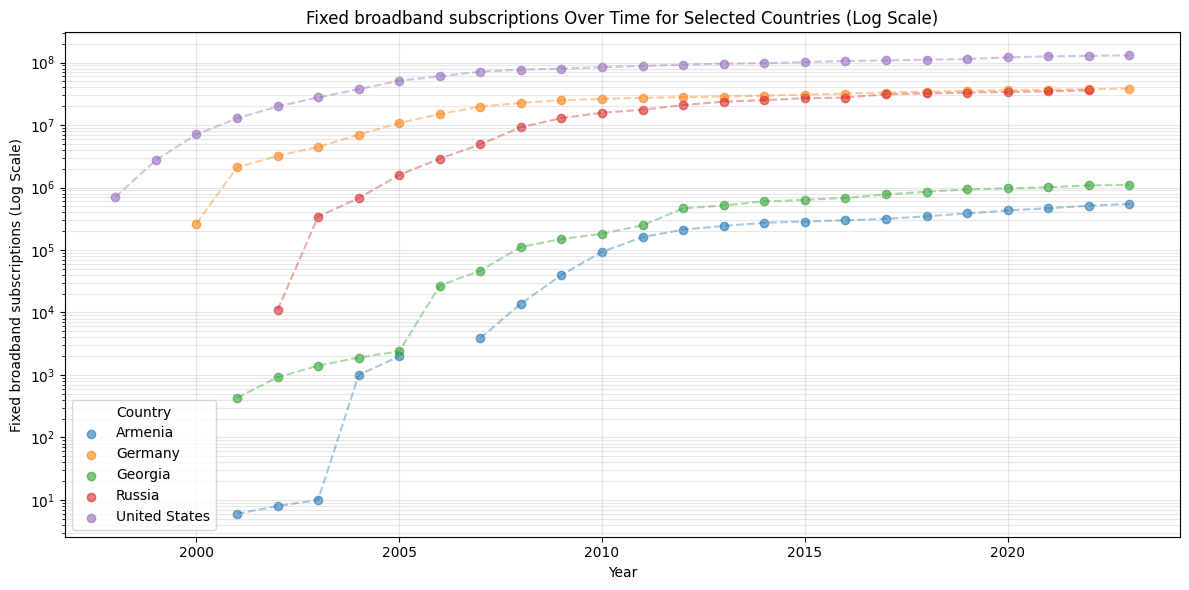

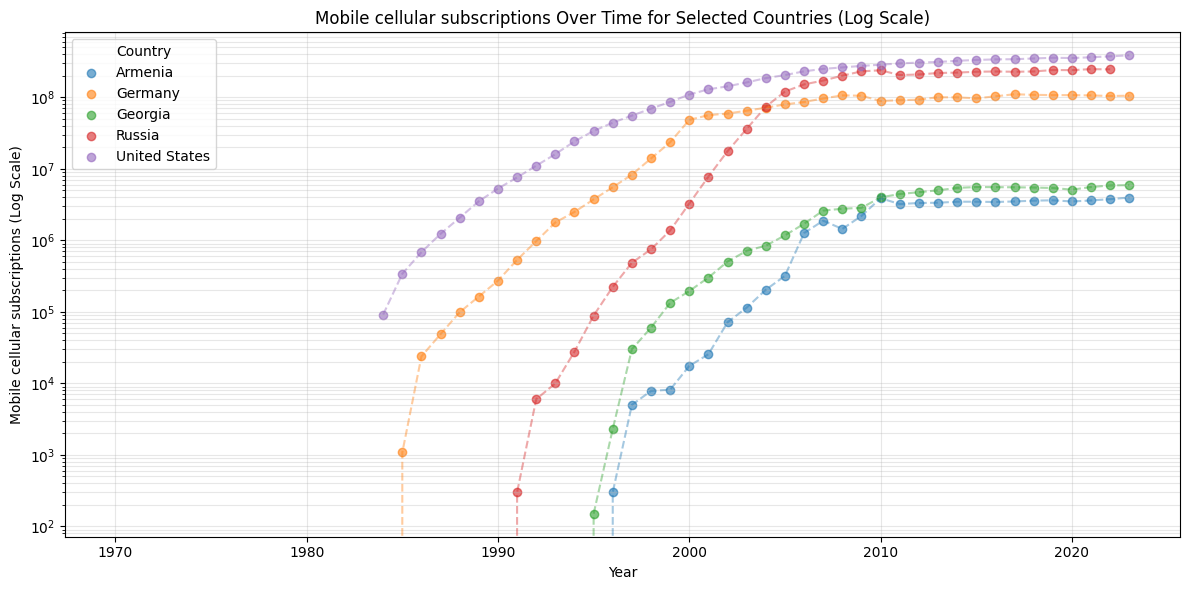

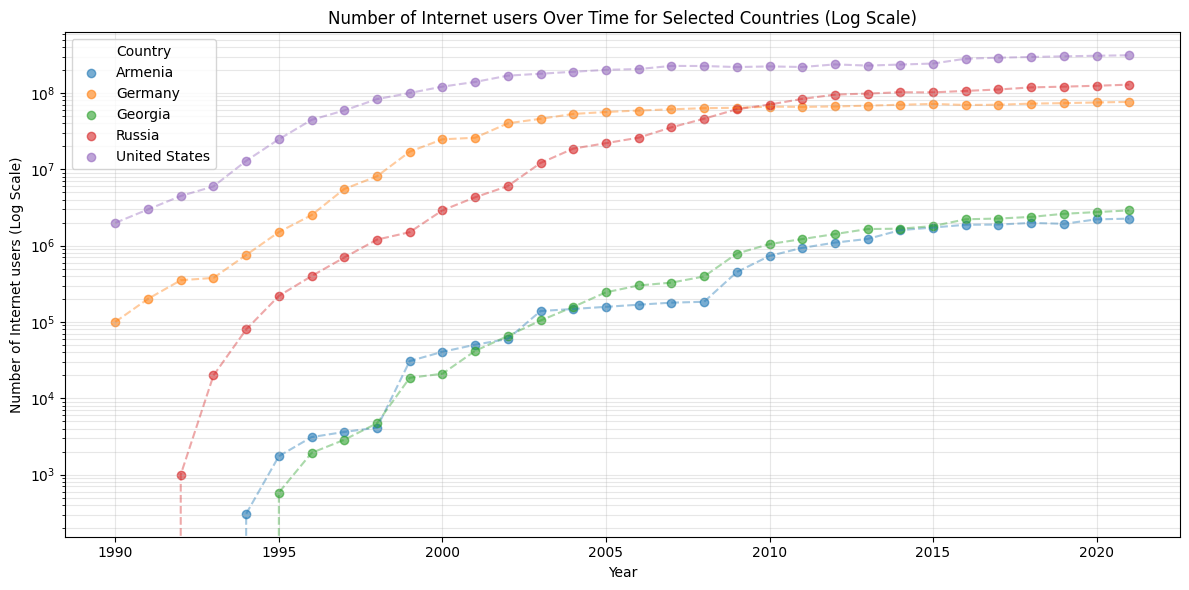

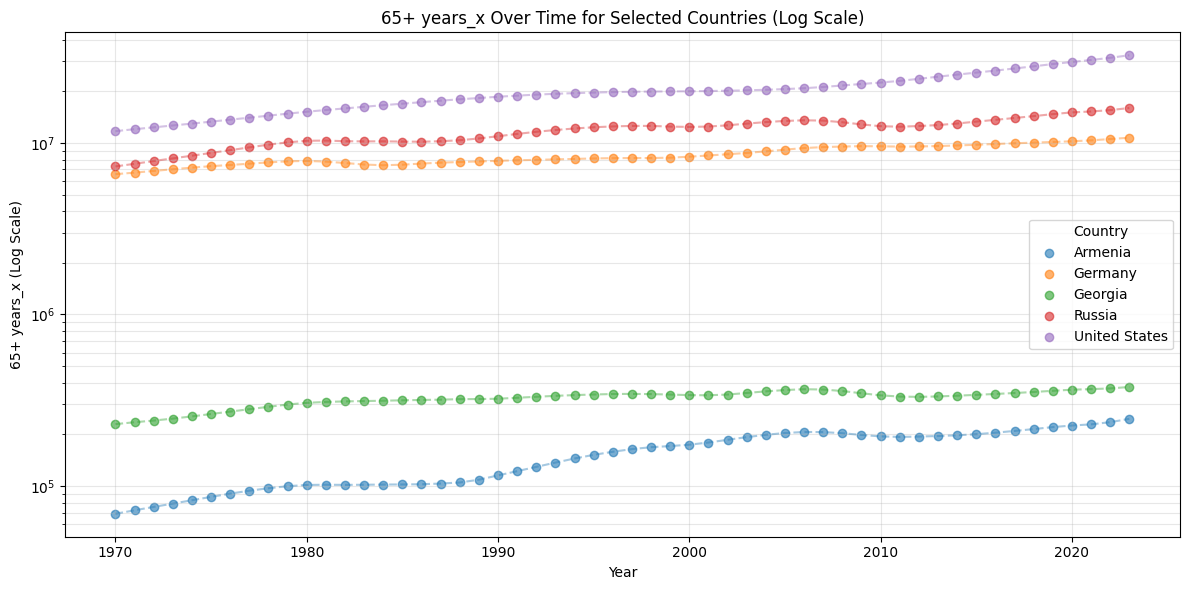

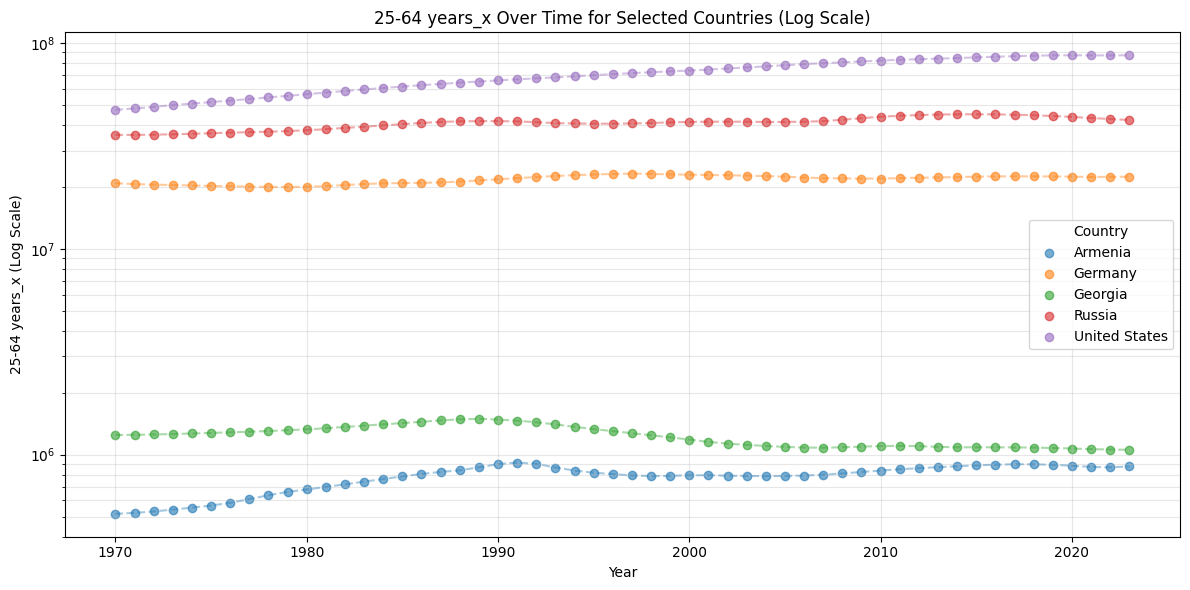

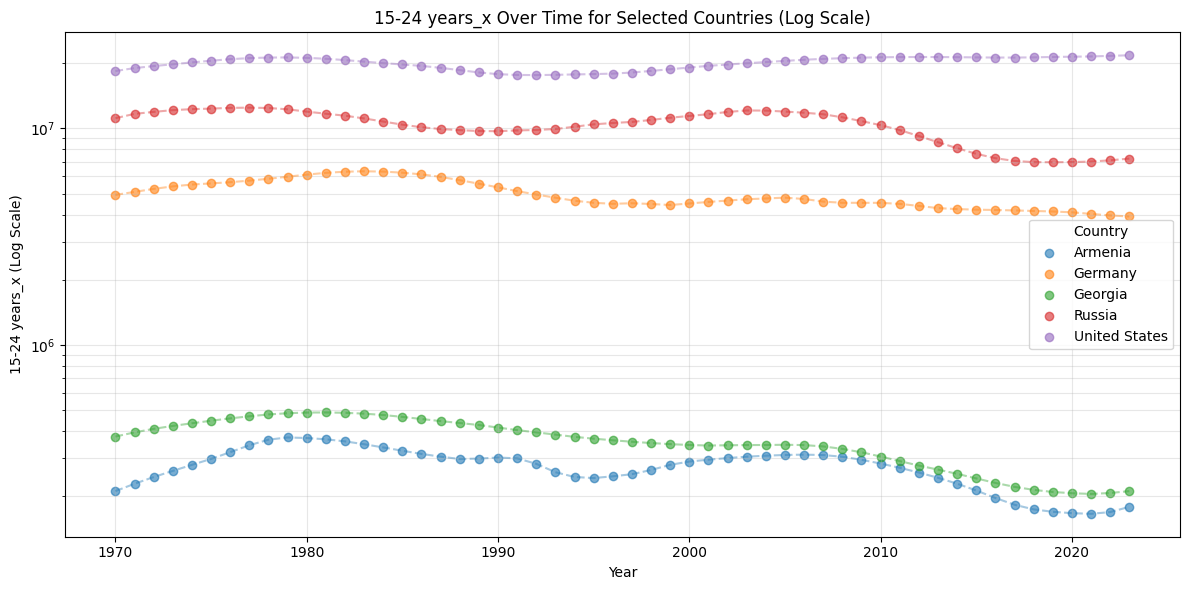

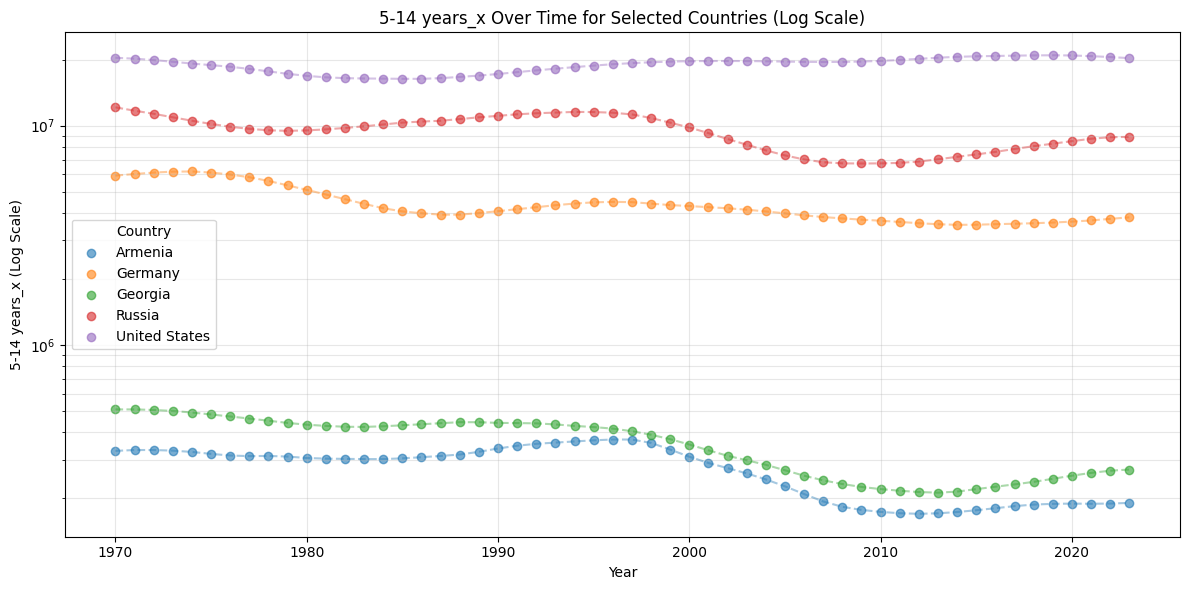

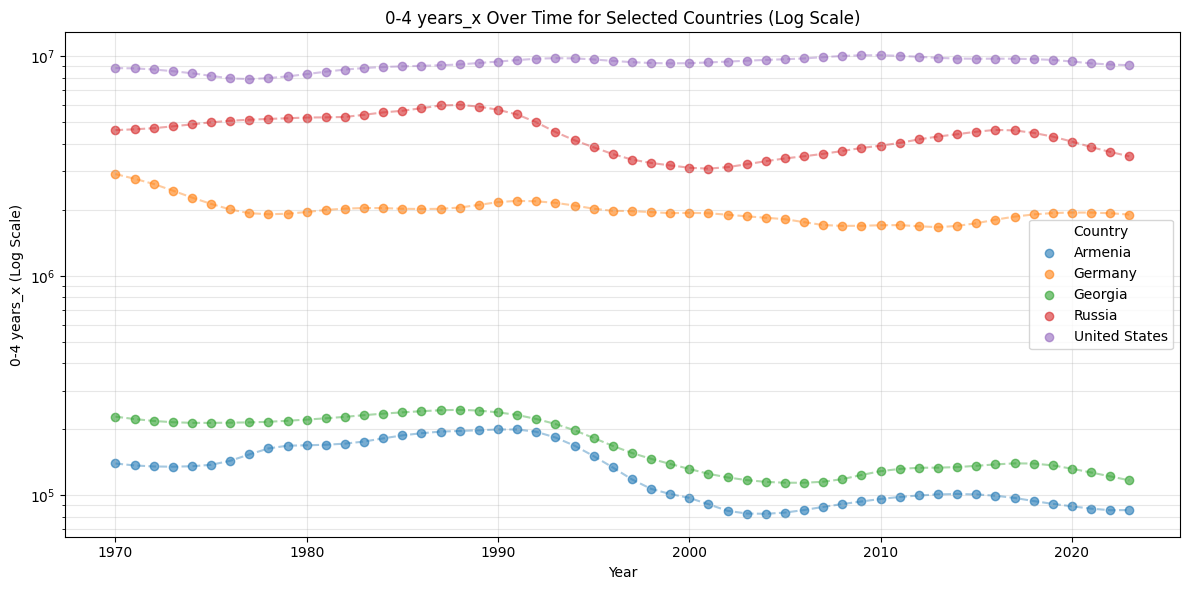

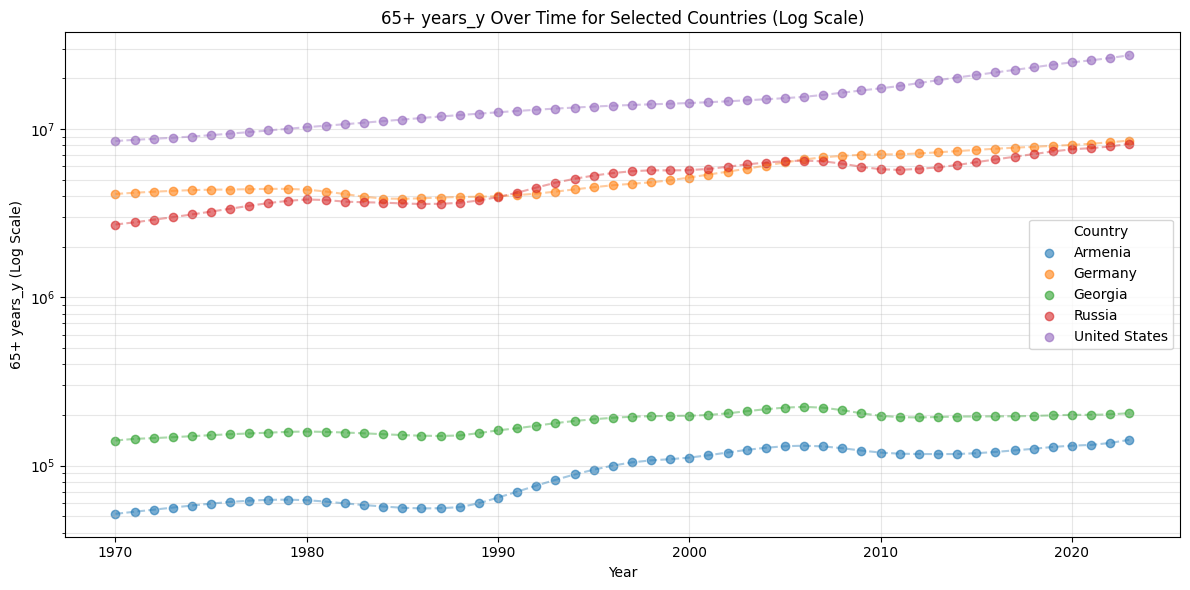

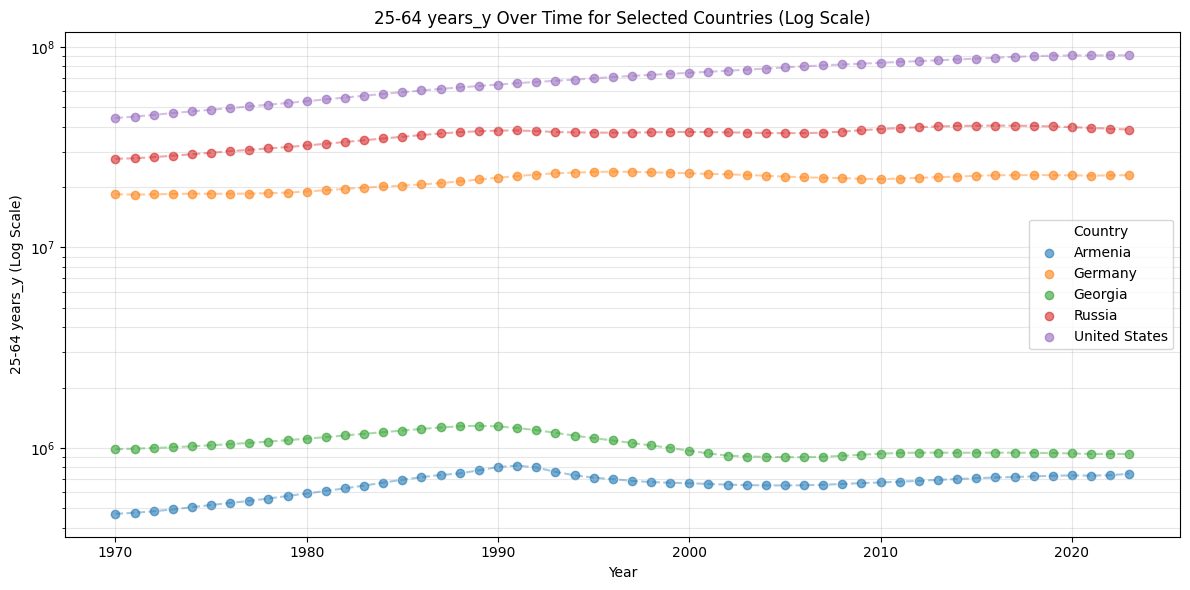

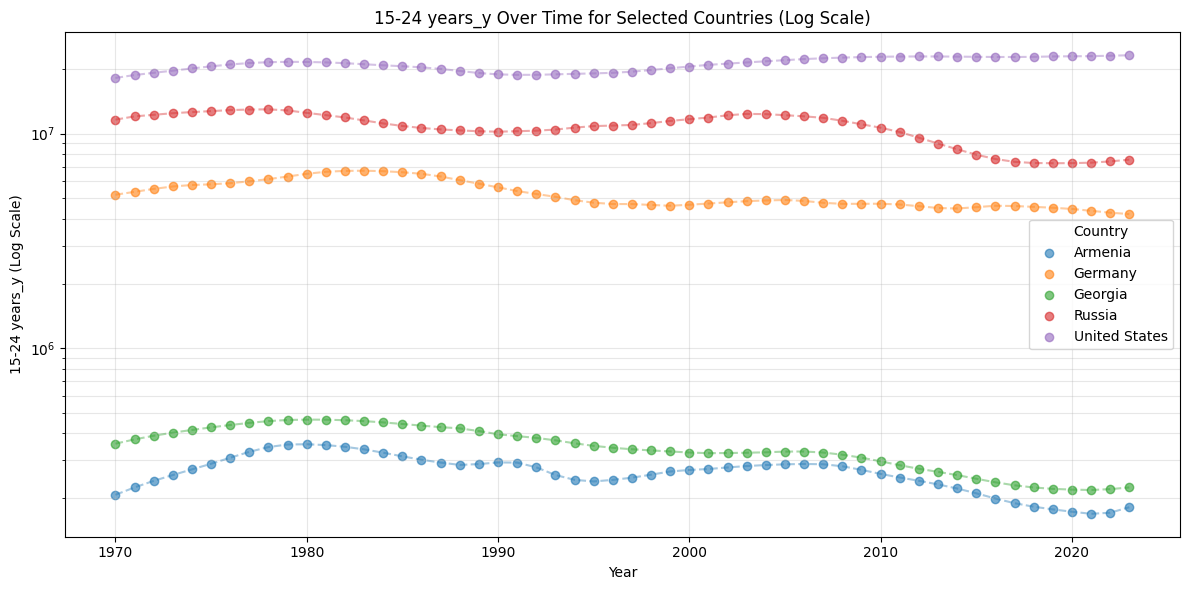

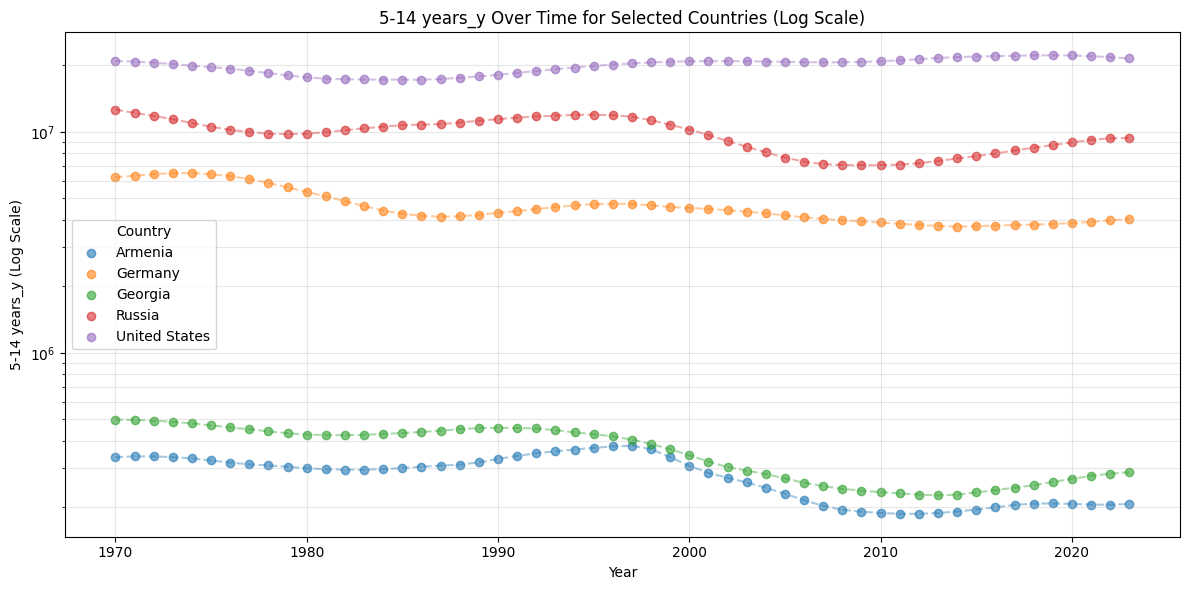

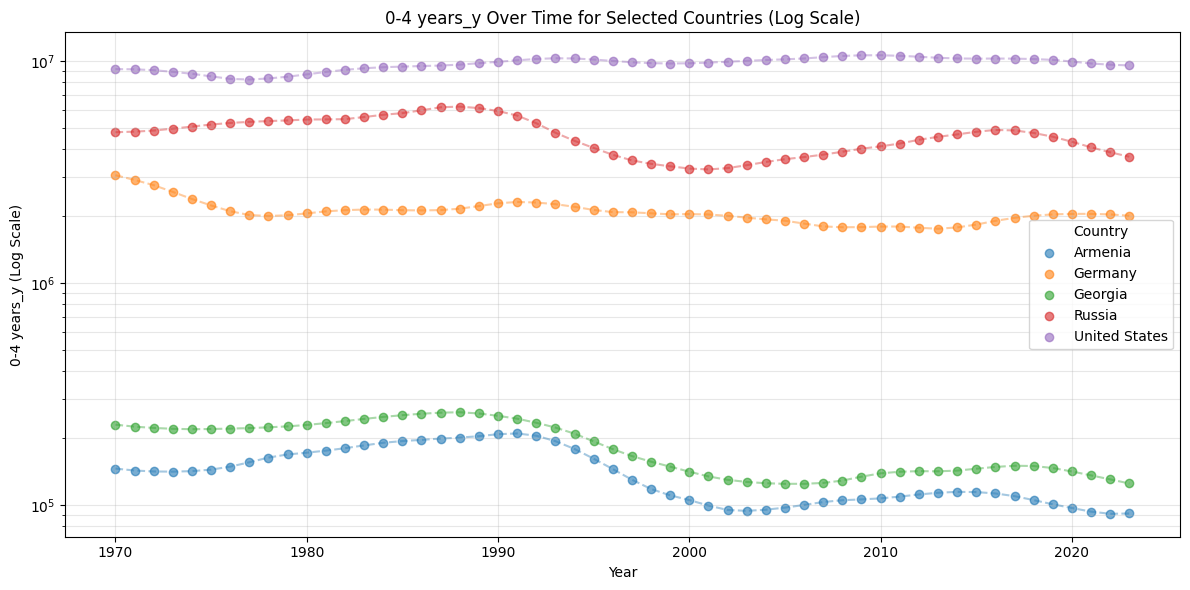

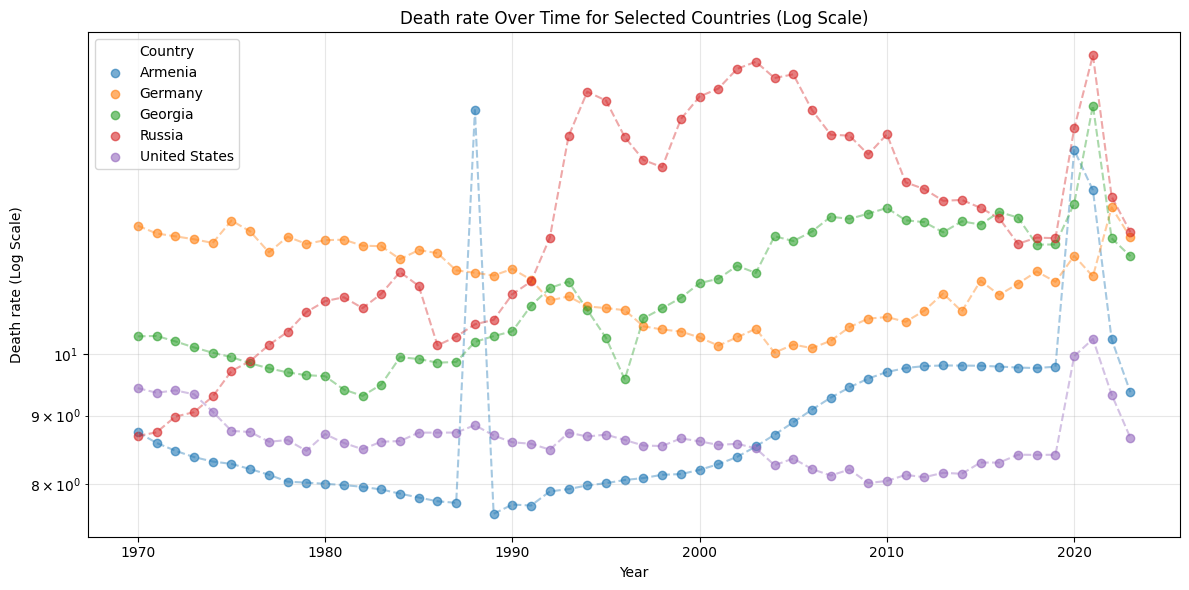

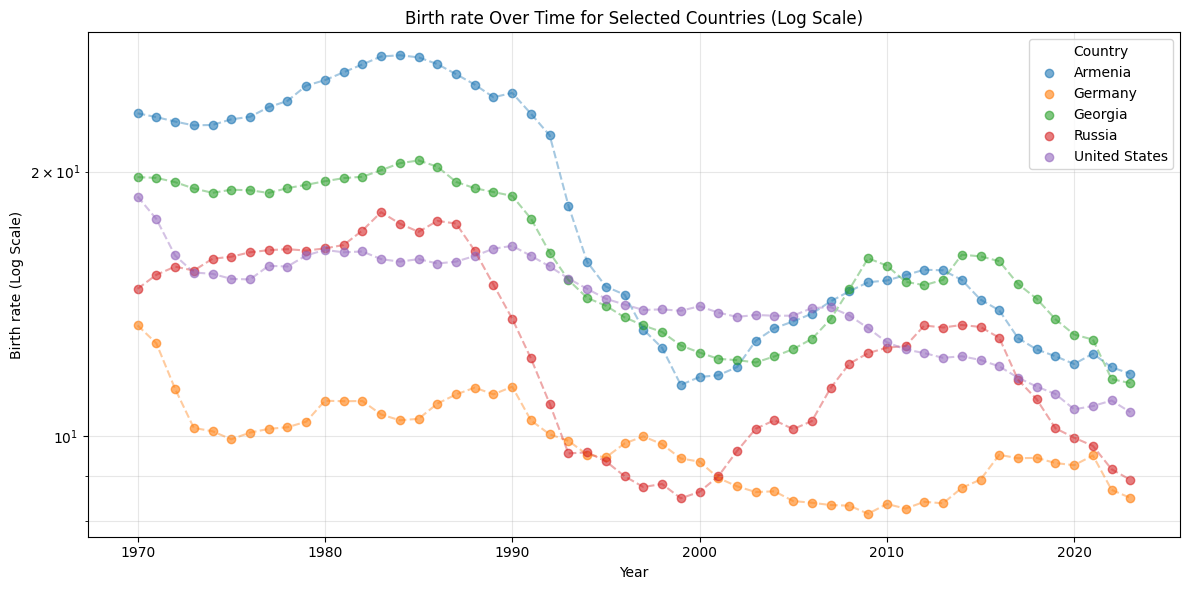

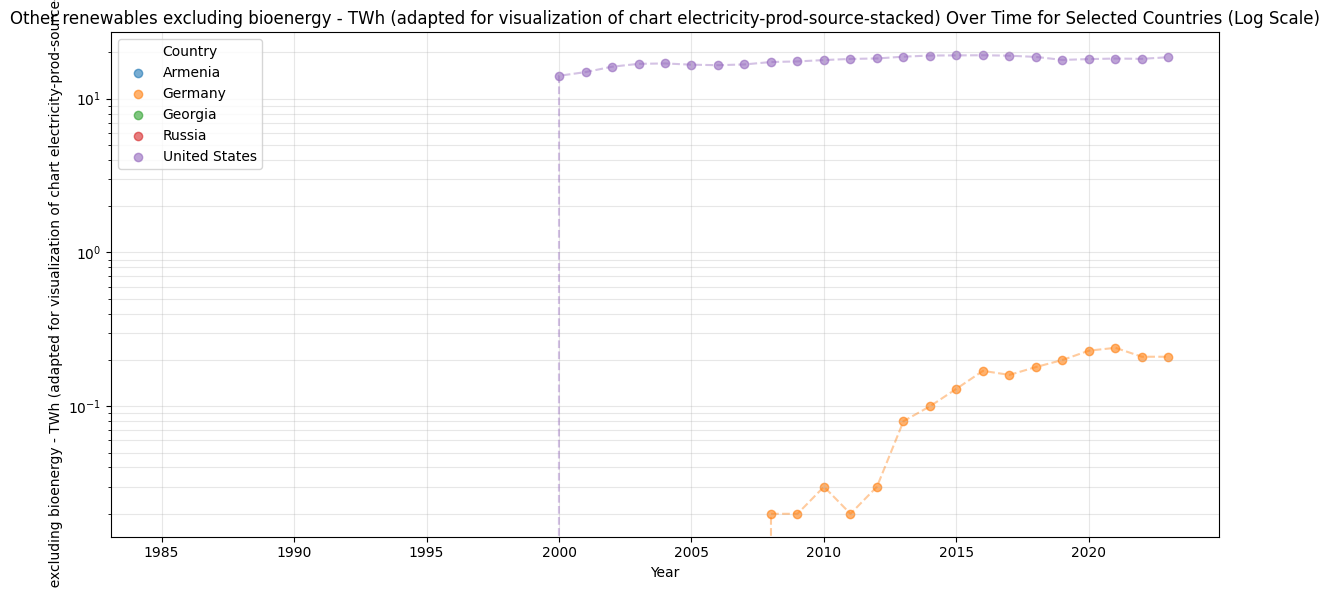

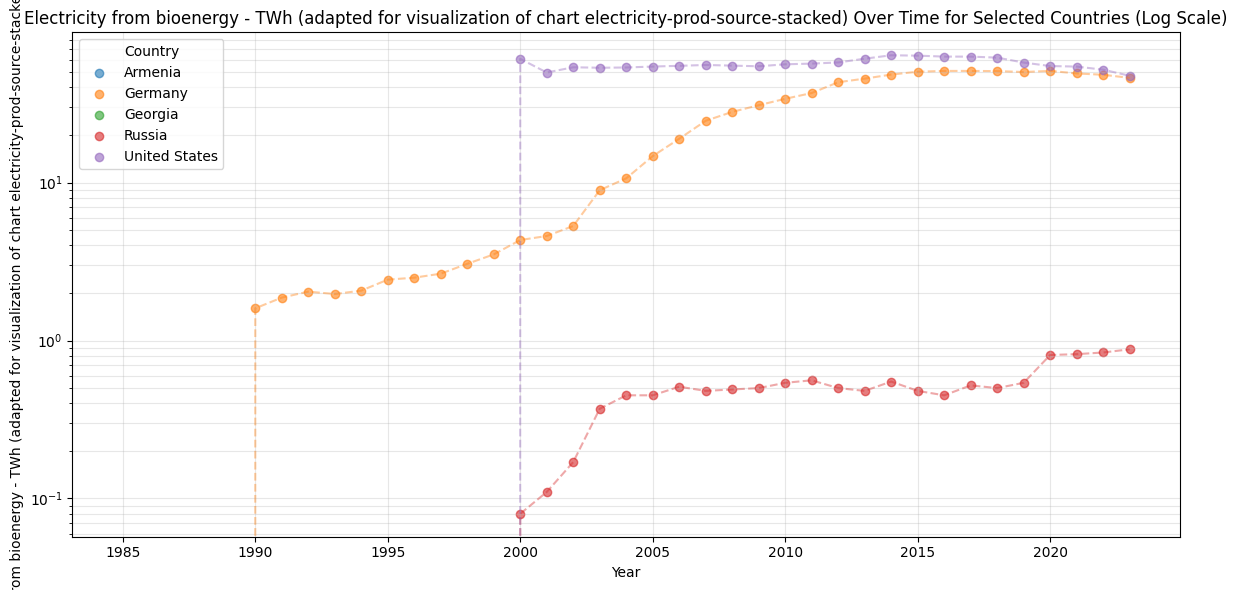

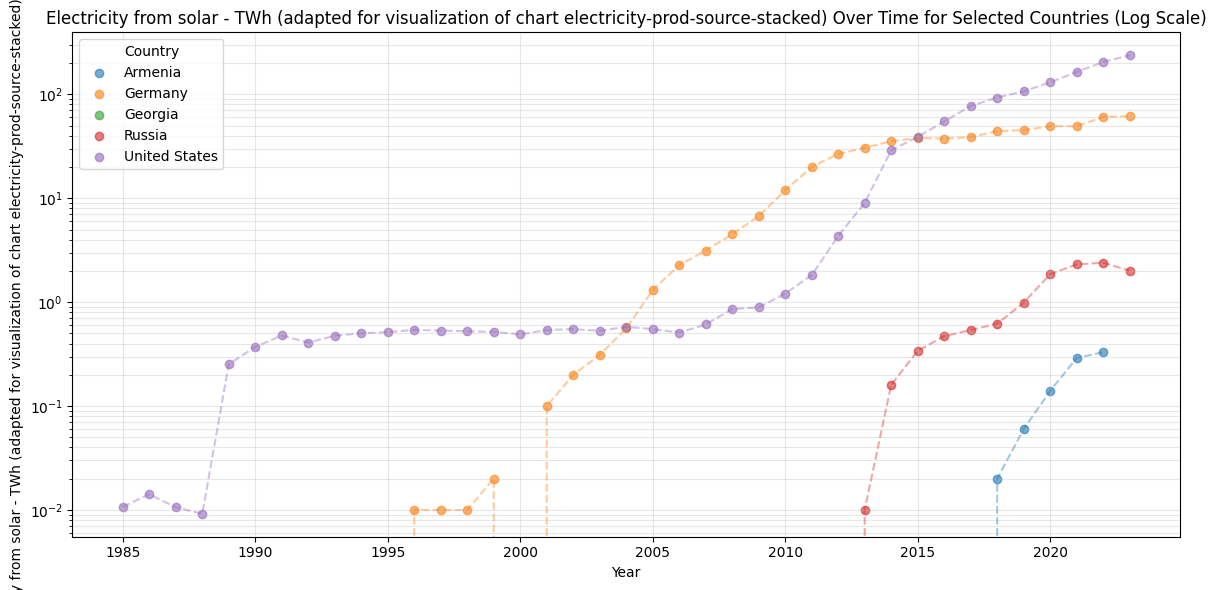

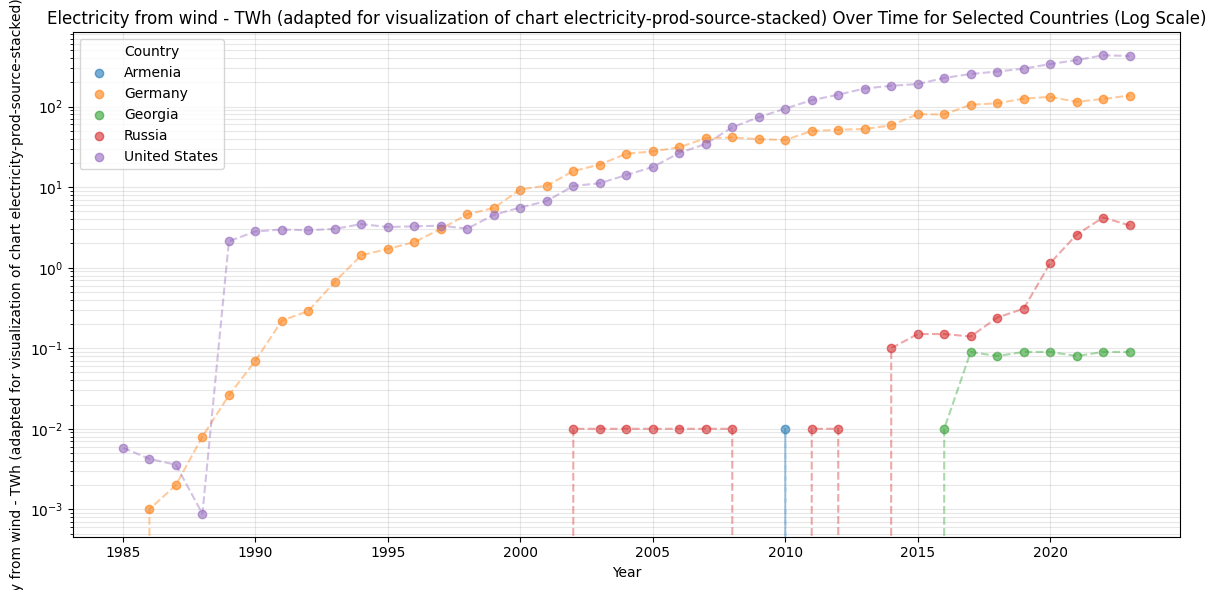

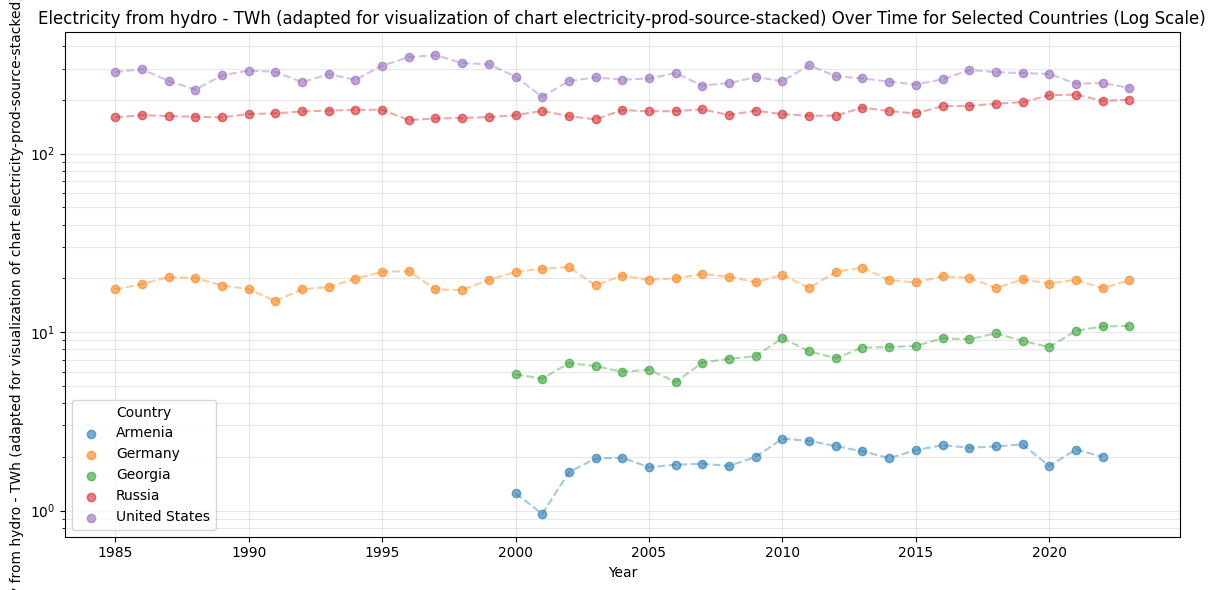

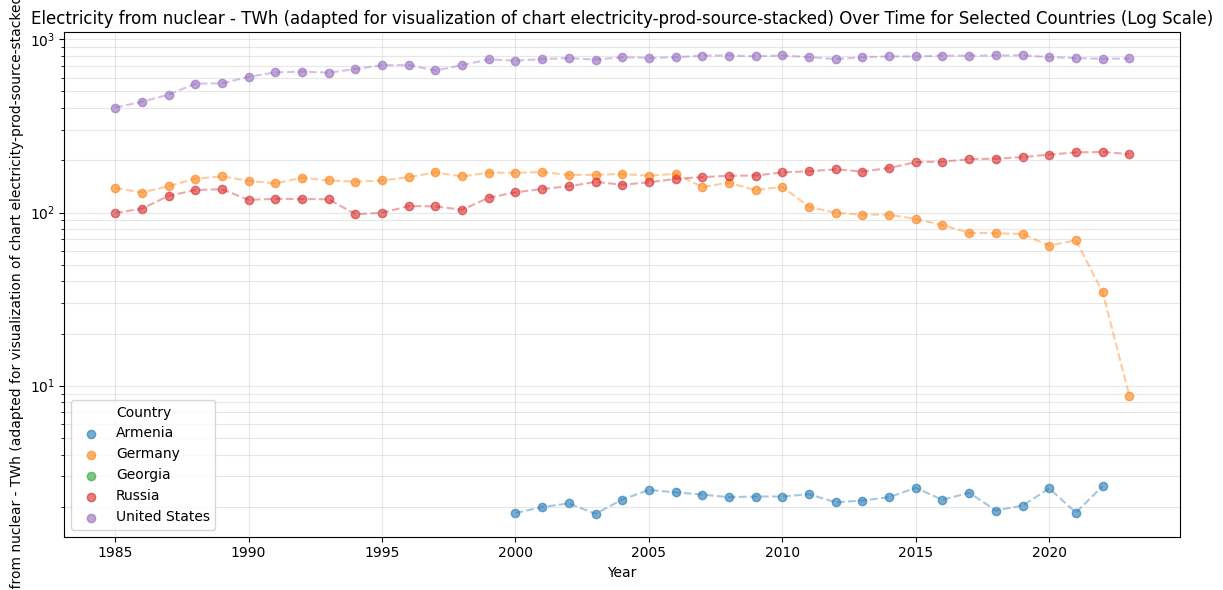

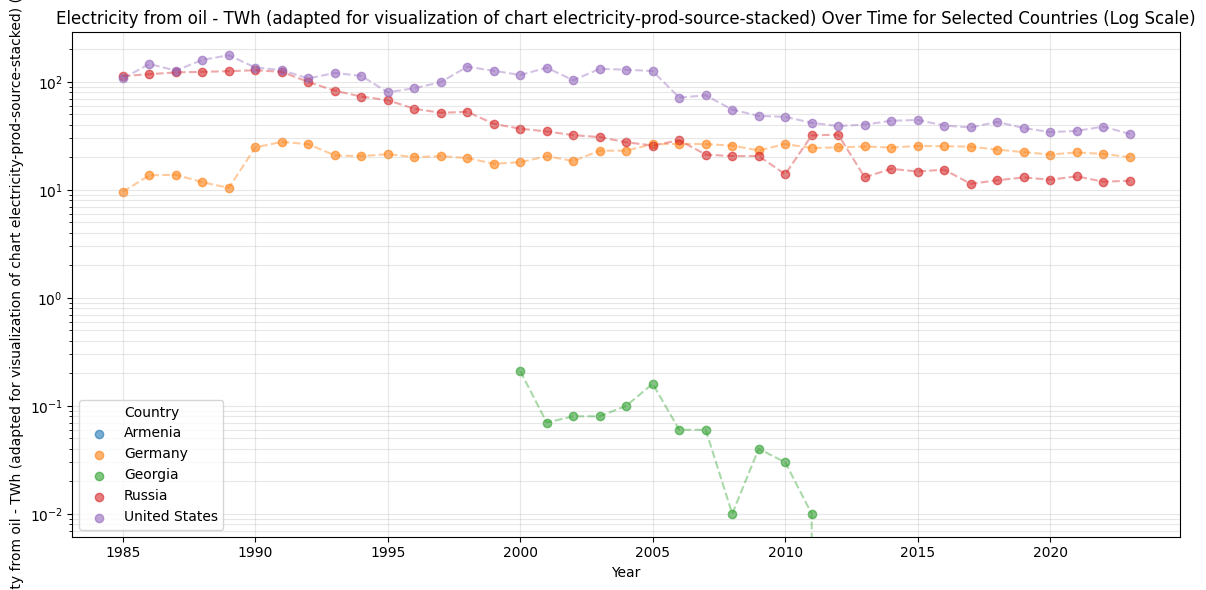

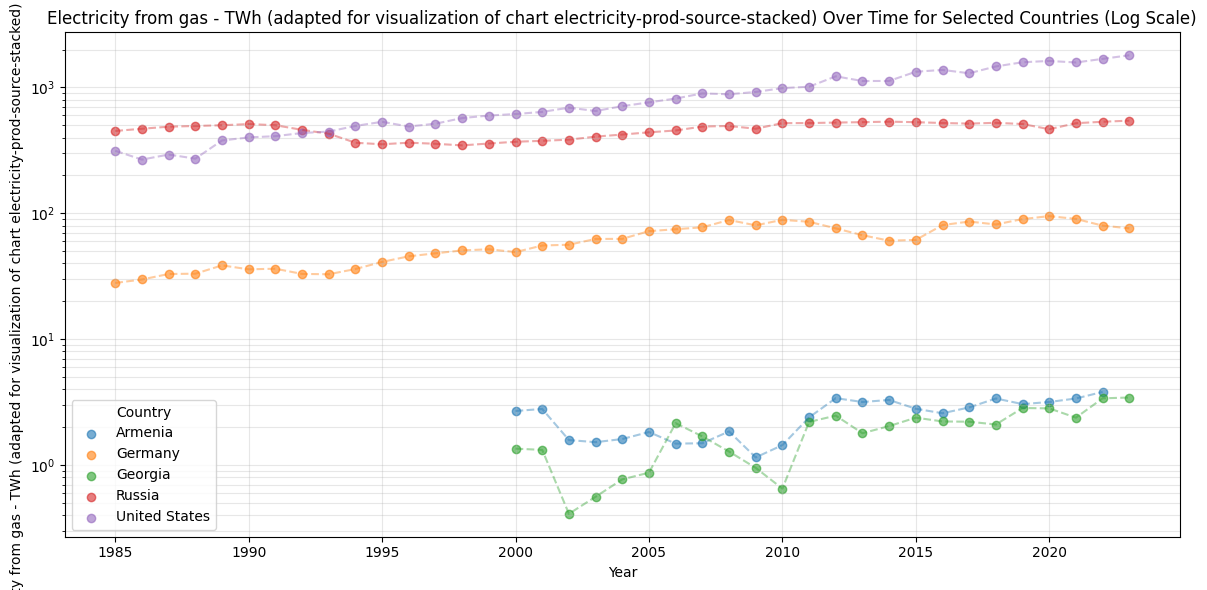

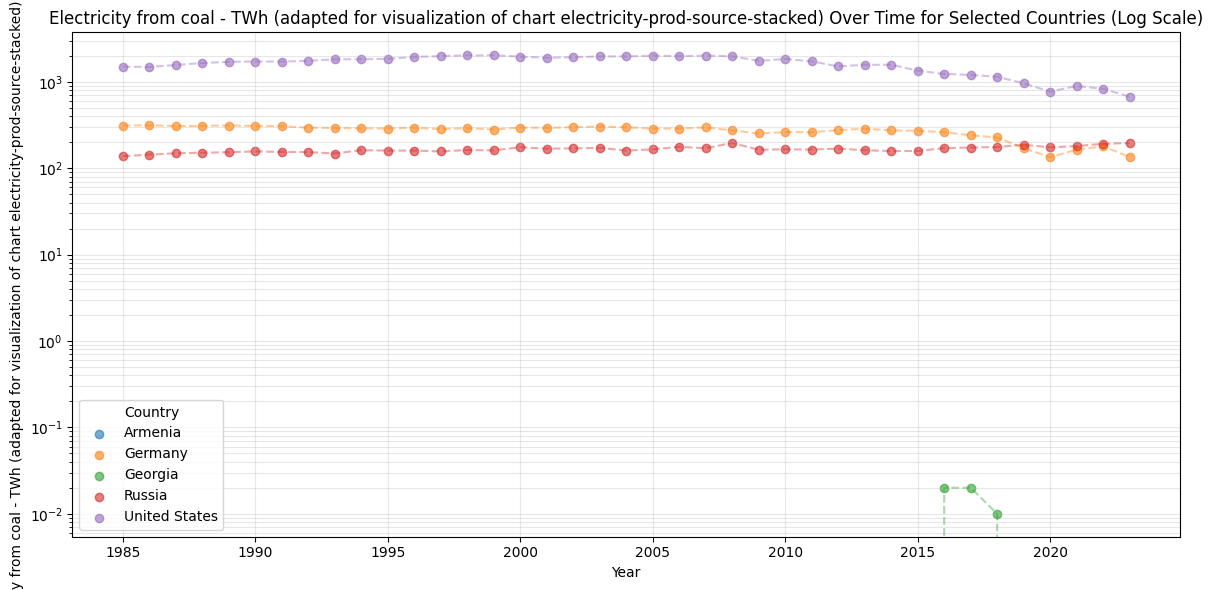

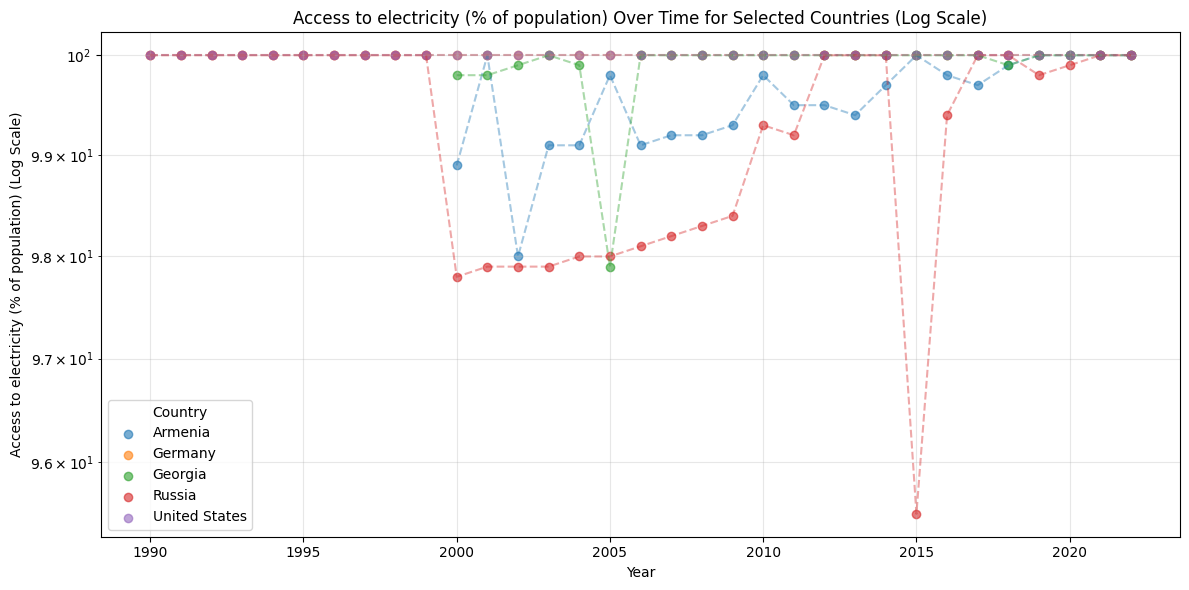

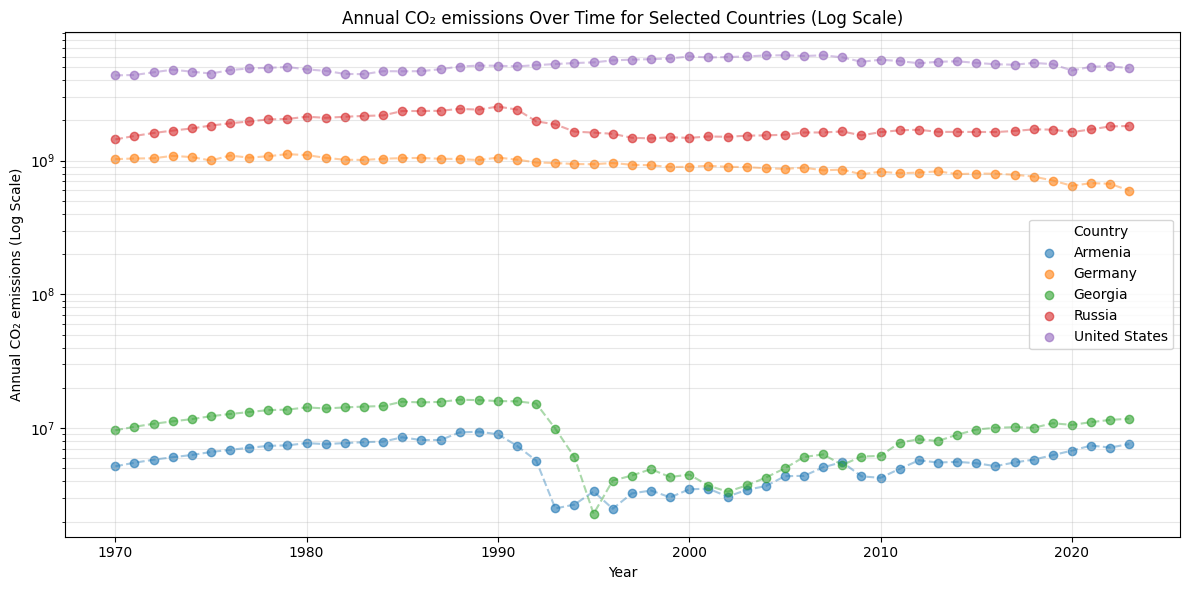

In [7]:
# Core data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/generated/filtered_dataset.csv')

# The countries we want to focus on
target_countries = ['Armenia', 'United States', 'Germany', 'Russia', 'Georgia']

# Make sure they're all in our dataset and handle case issues
available_countries = df['Entity'].unique()
country_mapping = {}

for target in target_countries:
    found = False
    # Try direct match
    if target in available_countries:
        country_mapping[target] = target
        found = True
    else:
        # Try case-insensitive match
        for country in available_countries:
            if target.lower() == country.lower():
                country_mapping[target] = country
                found = True
                break

    if not found:
        print(f"Warning: {target} not found in dataset. Available entities:")
        print(available_countries[:20])  # Show first 20 as example

# Filter the DataFrame to include only our target countries using the mapping
filtered_df = df[df['Entity'].isin(list(country_mapping.values()))]

# Get data columns (excluding 'Entity' and 'Year')
data_columns = [col for col in df.columns if col not in ['Entity', 'Year']]

# Check if we have data for the countries
if filtered_df.empty:
    print("No data found for the specified countries!")
else:
    available_countries = filtered_df['Entity'].unique()

    # Create scatter plots for each data column
    for column in data_columns:
        plt.figure(figsize=(12, 6))
        for country in available_countries:
            country_data = filtered_df[filtered_df['Entity'] == country]
            plt.scatter(country_data['Year'], country_data[column], label=country, alpha=0.6)
            plt.plot(country_data['Year'], country_data[column], alpha=0.4, linestyle='--')  # Add lines for trend
        plt.title(f'{column} Over Time for Selected Countries (Log Scale)')
        plt.xlabel('Year')
        plt.ylabel(f'{column} (Log Scale)')
        plt.yscale('log')  # Apply logarithmic scale to the y-axis
        plt.legend(title='Country')
        plt.grid(True, which="both", ls="-", alpha=0.3) # Add grid for both major and minor ticks
        plt.tight_layout()
        plt.show()